# **Instructions**

This document is a template, and you are not required to follow it exactly. However, the kinds of questions we ask here are the kinds of questions we want you to focus on. While you might have answered similar questions to these in your project presentations, we want you to go into a lot more detail in this write-up; you can refer to the Lab homeworks for ideas on how to present your data or results.

You don't have to answer every question in this template, but you should answer roughly this many questions. Your answers to such questions should be paragraph-length, not just a bullet point. You likely still have questions of your own -- that's okay! We want you to convey what you've learned, how you've learned it, and demonstrate that the content from the course has influenced how you've thought about this project.

# Project Name
Project mentor: the GOAT Edward Wang

Nick Geissler <ngeissl2@jh.edu>, Annie Wang <awang105@jh.edu>, Jonathan Ye <jye41@jh.edu>, Evan Zhu <ezhu13@jh.edu>

Link_to_git_repo - edward says making it public is sus

# Outline and Deliverables

List the deliverables from your project proposal. For each uncompleted deliverable, please include a sentence or two on why you weren't able to complete it (e.g. "decided to use an existing implementation instead" or "ran out of time"). For each completed deliverable, indicate which section of this notebook covers what you did.

If you spent substantial time on any aspects that weren't deliverables in your proposal, please list those under "Additional Work" and indicate where in the notebook you discuss them.

### Uncompleted Deliverables
1. "Expect to complete #1: Spamicity evaluation": This metric proved less important than others in our opinion (F1 score, overall accuracy, type 2 errors, etc.)
2. "Would like to complete #1: Further malevolent detection": We believe this to be very intensive for marginal improvement. Our algorithm is quite accurate, and implementing some of these algorithms could've been an entire project in its own right.
3. "Would like to complete #3: Error analysis": With single words and tokens as features, and no current features in our preprocessing to capture clusters of words or even word orderings, this would be extremely difficult to do. It would addtitionally likely result in AdaBoost being incompatible with the newly preprocessed data.
4. "Would like to complete #4: Removal of typos": We concluded this would in fact be disadvantageous. Many spam and scam emails utilize typos to seem more "believable."


### Completed Deliverables
1. "Must complete #1: Implement AdaBoost": We discuss our dataset pre-processing [in "Dataset" below](#scrollTo=zFq-_D0khnhh&line=10&uniqifier=1).
2. "Must complete #2: Evaluation of performance": We discuss training our logistic regression baseline [in "Baselines" below](#scrollTo=oMyqHUa0jUw7&line=5&uniqifier=1).
3. "Must complet
 #3: Basic success benchmark": We discuss our model's basic performance [in "Results" below](#results).
4. "Expect to complete #2: Custom loss function": We discuss our custom loss function that penalizes type 2 errors according to the user's specifications [in "Custom loss function" below](#custom-loss-function). 
5. "Expect to complete #3: Visualization": We visualize and interpret our results [in "Results" below](#results).
6. "Expect to complete #4: Comparative evaluation": We compare our model's results against those of SVM and random forest [in "Results" below](#results).
7. "Would like to complete #2: Personalized deployment data": We sampled some proprietary emails to see if our model generalizes to real-world situtations in ##r we do this
##idk man maybe we scrape angie emailonal Deliverables
1. We decided to add a second baseline using the published model from this paper. We discuss this [in "Baselines" below](#scrollTo=oMyqHUa0jUw7&line=5&uniqifier=1).
2. ...

# Preliminaries

## What problem were you trying to solve or understand?

Q. What are the real-world implications of this data and task?

A.

How is this problem similar to others we’ve seen in lectures, breakouts, and homeworks?

A. 

Q. What makes this problem unique?

A. 

Q. WhScammers evolve and also no one uses adaboost here

Also, AdaBoost is a at ethical implications does this problem have?

A. What if the scammers get laid off from their cushy scamming cetner jobs

## Dataset(s)

Q. Describe the dataset(s) you used.

A. Our dataset combines four datasets found on Kaggle. 

Q. How were they collected?

A. 

Q. Why did you choose them?

A. 

Q. How many examples in each?

A. In total, we had 184000 labeled emails and 47994 features



In [21]:
# Import guys
import pandas as pd
import numpy as np
from scipy import sparse
# from AdaBoostClassifier import AdaBoostClassifier
#%run AdaBoostWeak.py
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from sklearn import metrics

In [11]:
# Load your data and print 2-3 examples
df1 = pd.read_csv("data/spam.csv", usecols=[0,1])
print(df1.iloc[0:3,:])


  Category                                            Message
0      ham  Go until jurong point, crazy.. Available only ...
1      ham                      Ok lar... Joking wif u oni...
2     spam  Free entry in 2 a wkly comp to win FA Cup fina...


## Pre-processing

Please see our preprocessing2 jupyter notebook: {insert link}. 

### Questions

Q. What features did you use or choose not to use? Why?

A. 

Q. If you have categorical labels, were your datasets class-balanced?

A. 

Q. How did you deal with missing data? What about outliers?

A. 

Q. What approach(es) did you use to pre-process your data? Why?

A. 

Q. Are your features continuous or categorical? How do you treat these features differently?

A. 

In [16]:
# For those same examples above, what do they look like after being pre-processed?
# column names
with open('data/column_names.txt', 'r') as f:
    column_names = [line.strip() for line in f] # feature labels

sparse_dat = sparse.load_npz("data/sparse_df.npz")

# Extract labels from the first column
labels = sparse_dat[:, 0] # ground truth labels - 0 ham, 1 spam

# Create a list of column indices to keep
to_keep = list(set(range(sparse_dat.shape[1])) - set([0]))

# Extract the design matrix
X = sparse_dat[:, to_keep]

print(f'labels: \n{labels}')

labels: 
  (2, 0)	1
  (5, 0)	1
  (8, 0)	1
  (9, 0)	1
  (11, 0)	1
  (12, 0)	1
  (15, 0)	1
  (19, 0)	1
  (34, 0)	1
  (42, 0)	1
  (54, 0)	1
  (56, 0)	1
  (65, 0)	1
  (67, 0)	1
  (68, 0)	1
  (93, 0)	1
  (95, 0)	1
  (114, 0)	1
  (117, 0)	1
  (120, 0)	1
  (121, 0)	1
  (123, 0)	1
  (134, 0)	1
  (135, 0)	1
  (139, 0)	1
  :	:
  (15952, 0)	1
  (15953, 0)	1
  (15954, 0)	1
  (15955, 0)	1
  (15956, 0)	1
  (15957, 0)	1
  (15958, 0)	1
  (15959, 0)	1
  (15960, 0)	1
  (15961, 0)	1
  (15962, 0)	1
  (15963, 0)	1
  (15964, 0)	1
  (15965, 0)	1
  (15966, 0)	1
  (15967, 0)	1
  (15968, 0)	1
  (15969, 0)	1
  (15970, 0)	1
  (15971, 0)	1
  (15972, 0)	1
  (15973, 0)	1
  (15974, 0)	1
  (15975, 0)	1
  (15976, 0)	1


In [13]:
# Visualize the distribution of your data before and after pre-processing.
#   You may borrow from how we visualized data in the Lab homeworks.

# Not really applicable to us imo - could do some wacky shit I suppose

# Models and Evaluation

## Experimental Setup

### Evaluation metrics

Q. How did you evaluate your methods? Why is that a reasonable evaluation metric for the task?

A. F1, type 1 error, type 2 error, accuracy


### Custom loss function

Q. What did you use for your loss function to train your models? Did you try multiple loss functions? Why or why not?

A. Our loss function is pasted below. -INSERT DETAILS- We did try a couple other loss functions, but they sucked. There was that one loss function where it was np.exp(-proportion or whatever)

Furthermore, we implemented our own Adaboost algorithm to leverage this custom loss function. Link:  

In [14]:
# Code for loss functions, evaluation metrics or link to Git repo

def compute_error(y, y_pred, w_i, type2penalty, pen_factor):
    '''
    Calculate the error rate of a weak classifier m. Arguments:
    y: actual target value
    y_pred: predicted value by weak classifier
    w_i: individual weights for each observation

    
    Note that all arrays should be the same length. Convert sparse array to regular array before calling
    '''
    if type2penalty:
        error = (sum(w_i * (t2_pred_err_vec(y, y_pred, pen_factor)).astype(float)))/sum(w_i)
    else:
        error = (sum(w_i * (np.not_equal(y, y_pred)).astype(int)))/sum(w_i)

    return error
def t2_pred_err_vec(y,y_pred, pen_factor):
    pred_err_vec = ((y_pred==-1) & (y==1))* pen_factor
    better_err_vec = ((y_pred==1)) & (y==-1)
    pred_err_vec = pred_err_vec+better_err_vec
    if np.isnan(pred_err_vec).any(): print("WAHHHHH NAN")
    return pred_err_vec


### Train/Test split

Q. How did you split your data into train and test sets? Why?

A. We stratified by the y labels - so that we had similar proportion of spam in both train + test

In [17]:
# Train test split

# Use train_test_split.
X_train, X_test, y_train, y_test = train_test_split(X, labels, test_size=0.2, shuffle=True, stratify=labels.toarray().ravel())

y_train_flat = y_train.copy().toarray().ravel()
#y_train_flat[y_train_flat == -1] = 0 See if you have to run this line if anything sus

y_test_flat = y_test.copy().toarray().ravel()
# y_test_flat[y_test_flat == -1] = 0 Same here


## Baselines

Q. What baselines did you compare against? Why are these reasonable?

A. Sklearn SVM and Random Forest with default parameters. WHY ARE REASONABLE

Q. Did you look at related work to contextualize how others methods or baselines have performed on this dataset/task? If so, how did those methods do?

A. Yes of course - they are very good

In [18]:
# Helper function to calculate error types

def errors(y, y_pred):
        """
        Calculate the proportion of type 2 errors - when the true label is 1 - spam, and the predicted label is 0 - ham

        Args:
        y: true labels
        y_pred: predicted labels
        """
        n = y.shape[0]
        y[y == -1] = 0
        type2errors = ((y == 1) & (y_pred == 0)).sum().item()
        type1errors = ((y == 0) & (y_pred == 1)).sum().item()
        correct = (y_pred == y).sum().item()
        #print(np.unique(y_pred), np.unique(y))
        return type2errors, type1errors, correct

In [40]:
# SVM

from sklearn import svm
svm_example = svm.SVC(probability = True)
svm_example.fit(X_train, y_train_flat)


In [91]:
# Train metrics
predictions = svm_example.predict(X_train)
type2, type1, correct = errors(y_train_flat, predictions)
f1 = metrics.f1_score(y_true = y_train_flat, y_pred= predictions)

svm_train_metrics = ["svm",type2, type1, correct/len(predictions), f1]

# For ROC
scores = svm_example.predict_proba(X_test)
svm_fpr, svm_tpr, thresholds  = metrics.roc_curve(y_test_flat, scores[:,1])

# type 2 error stuff TEST
predictions = svm_example.predict(X_test)
type2, type1, correct = errors(y_test_flat, predictions)
f1 = metrics.f1_score(y_true = y_test_flat, y_pred= predictions)

svm_test_metrics = ["svm", type2, type1, correct/len(predictions), f1]

In [41]:
# Random Forest

from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier()
rf.fit(X_train, y_train_flat)

In [90]:
# Train metrics
predictions = rf.predict(X_train)
type2, type1, correct = errors(y_train_flat, predictions)
f1 = metrics.f1_score(y_true = y_train_flat, y_pred= predictions)

rf_train_metrics = ["rf",type2, type1, correct/len(predictions), f1]

# For ROC
scores = rf.predict_proba(X_test)
rf_fpr, rf_tpr, thresholds = metrics.roc_curve(y_test_flat, scores[:,1])

# type 2 error stuff TEST
predictions = rf.predict(X_test)
type2, type1, correct = errors(y_test_flat, predictions)
f1 = metrics.f1_score(y_true = y_test_flat, y_pred= predictions)

rf_test_metrics = ["rf", type2, type1, correct/len(predictions), f1]

## Methods

Q. What methods did you choose? Why did you choose them?

A. 

Q. How did you train these methods, and how did you evaluate them? Why?

A. 

Q. Which methods were easy/difficult to implement and train? Why?

A. Implementation was decently hard. Big obstacle was getting the weak learners to be unique. Maybe also talk about boosting RF? Link github


Q. For each method, what hyperparameters did you evaluate? How sensitive was your model's performance to different hyperparameter settings?

A. First, we ran a grid search to find the best set of parameters for our goal - to reduce type 2 error (actual spam email classified as ham) while not sacrificing too much accuracy. Details are in the grid search section

## Grid Search

EVAN WAHHHH - add details (explain validation set, cross fold, yada yada) and most importantly paste that figure in here

In [ ]:
# do something here

## Training the model

Using our choise of parameters from grid search:

penalty factor = 2

decision tree depth = 5 - for the sake of speed

number of boosting rounds = 200 - for the sake of speed


In [79]:
# Code for training models, or link to your Git repository
%run AdaBoostWeakClassic.py

aboost_final = AdaBoostWeakClassic(rounds = 200, type2penalty=True, pen_factor = 2.0, maxDTdepth=5)
aboost_final.fit(X_train, y_train_flat)

In [84]:
# Training metrics
predictions = aboost_final.predict(X_train)
type2, type1, correct = errors(y_train.toarray().ravel(), predictions)
print("Final Model (without penalty) Training set Accuracy: ", correct/len(predictions))
print(f'unique predictions - should be 0 and 1: {np.unique(predictions)}')
print(f'type 2 errors: {type2} \n type 1 errors: {type1}')
# y_train_flat = y_train.copy().toarray().ravel()
# y_train_flat[y_train_flat == -1] = 0

f1 = metrics.f1_score(y_true = y_train_flat, y_pred= predictions)
print(f'F1 score: {f1}')

# aboost_train_metrics = [type2, type1, correct/len(predictions), f1]

Final Model (without penalty) Training set Accuracy:  0.9989672266593225
unique predictions - should be 0 and 1: [0 1]
type 2 errors: 3 
 type 1 errors: 12
F1 score: 0.9984843892088512


In [85]:
aboost_train_metrics = ["adaboost",type2, type1, correct/len(predictions), f1]

In [86]:
# Test Metrics
# For ROC
probits = aboost_final.predict_probs(X_test)
ada_fin_fpr, ada_fin_tpr, thresholds  = metrics.roc_curve(y_test_flat, probits)

predictions = aboost_final.predict(X_test)
type2, type1, correct = errors(y_test_flat, predictions)
f1 = metrics.f1_score(y_true = y_test_flat, y_pred= predictions)

# aboost_test_metrics = [type2, type1, correct/len(predictions), f1]

In [87]:
aboost_test_metrics = ["adaboost",type2, type1, correct/len(predictions), f1]

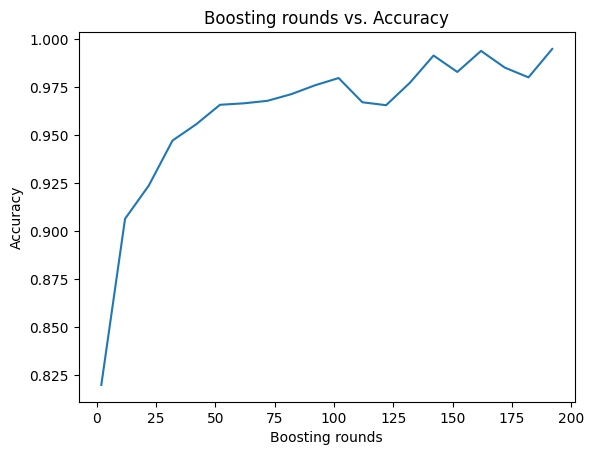

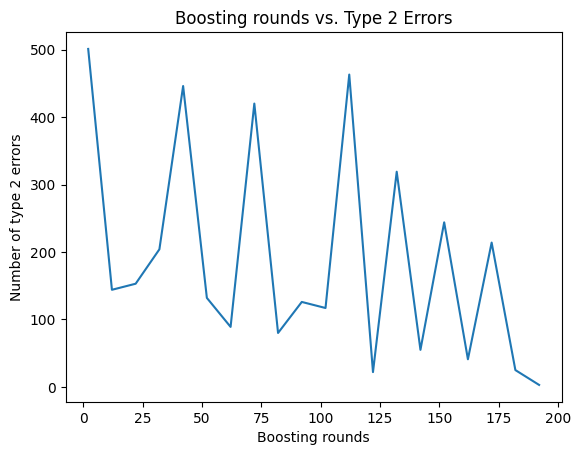

In [31]:
# Show plots of how these models performed during training. FUCK
#  For example, plot train loss and train accuracy (or other evaluation metric) on the y-axis,
#  with number of iterations or number of examples on the x-axis.
plt.plot(range(2, 201, 10), aboost_final.accuracies)
plt.xlabel("Boosting rounds")
plt.ylabel("Accuracy")
plt.title("Boosting rounds vs. Accuracy")
plt.show()
plt.plot(range(2, 201, 10), aboost_final.type2errors)
plt.xlabel("Boosting rounds")
plt.ylabel("Number of type 2 errors")
plt.title("Boosting rounds vs. Type 2 Errors")
plt.show()

## Results

Show tables comparing your methods to the baselines.

Q. What about these results surprised you? Why?

A. 

Q. Did your models over- or under-fit? How can you tell? What did you do to address these issues?

A. 

Q. What does the evaluation of your trained models tell you about your data? How do you expect these models might behave differently on different data?  

A. 

In [ ]:
# Show plots or visualizations of your evaluation metric(s) on the train and test sets.
#   What do these plots show about over- or under-fitting?
#   You may borrow from how we visualized results in the Lab homeworks.
#   Are there aspects of your results that are difficult to visualize? Why?

### ROC Curve Comparison


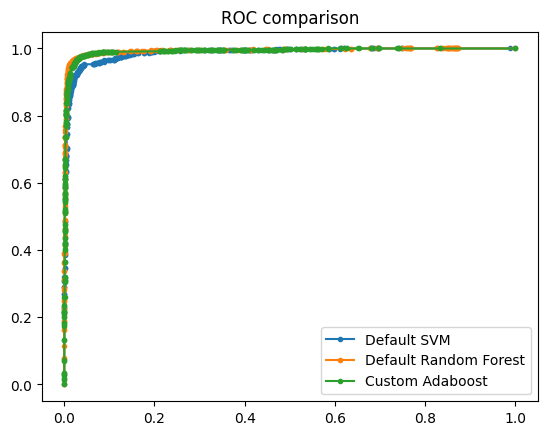

In [93]:
plt.plot(svm_fpr, svm_tpr, marker='.', label='Default SVM')
plt.plot(rf_fpr, rf_tpr, marker='.', label='Default Random Forest')
plt.plot(ada_fin_fpr, ada_fin_tpr, marker='.', label='Custom Adaboost')


plt.title("ROC comparison")
plt.legend()

### Table

In [92]:
from prettytable import PrettyTable

train_table = PrettyTable(["train method","type 2", "type 1", "accuracy", "F1"])
train_table.add_row(svm_train_metrics)
train_table.add_row(rf_train_metrics)
train_table.add_row(aboost_train_metrics)
train_table._rows[-1] = [f"\033[1m{cell}\033[0m" for cell in train_table._rows[-1]]
print(train_table)

test_table = PrettyTable(["test method","type 2", "type 1", "accuracy", "F1"])
test_table.add_row(svm_test_metrics)
test_table.add_row(rf_test_metrics)
test_table.add_row(aboost_test_metrics)
test_table._rows[-1] = [f"\033[1m{cell}\033[0m" for cell in test_table._rows[-1]]
print(test_table)

+--------------+--------+--------+--------------------+--------------------+
| train method | type 2 | type 1 |      accuracy      |         F1         |
+--------------+--------+--------+--------------------+--------------------+
|     svm      |  547   |   65   | 0.957862847700358  | 0.934935147778014  |
|      rf      |   1    |   1    | 0.9998622968879096 | 0.9997977346278317 |
|   adaboost   |   3    |   12   | 0.9989672266593225 | 0.9984843892088512 |
+--------------+--------+--------+--------------------+--------------------+
+-------------+--------+--------+--------------------+--------------------+
| test method | type 2 | type 1 |      accuracy      |         F1         |
+-------------+--------+--------+--------------------+--------------------+
|     svm     |  206   |   22   | 0.9372246696035242 | 0.9003496503496503 |
|      rf     |   64   |   24   | 0.9757709251101322 | 0.9638157894736842 |
|   adaboost  |   44   |   62   | 0.9708149779735683 | 0.957429718875502  |
+----

# Discussion

## What you've learned

*Note: you don't have to answer all of these, and you can answer other questions if you'd like. We just want you to demonstrate what you've learned from the project.*

Q. What concepts from lecture/breakout were most relevant to your project? How so?

A. 

Q. What aspects of your project did you find most surprising?

A. 

Q. What lessons did you take from this project that you want to remember for the next ML project you work on? Do you think those lessons would transfer to other datasets and/or models? Why or why not?

A. 

Q. What was the most helpful feedback you received during your presentation? Why?

A. We got no feedback

Q. If you had two more weeks to work on this project, what would you do next? Why?

A. Probably nothing